In [52]:
import pandas as pd

In [53]:
#while using colab need to load datas to this environment, so first upload it from local disk to collab environment
from google.colab import files
file_upload=files.upload()

In [54]:
#convert the excel file to dataframe
df=pd.read_excel('ABCCompany.xlsx')
print(df.head)

<bound method NDFrame.head of               Name            Team  Number Position  Age               Height  \
0    Avery Bradley  Boston Celtics       0       PG   25  2023-02-06 00:00:00   
1      Jae Crowder  Boston Celtics      99       SF   25  2023-06-06 00:00:00   
2     John Holland  Boston Celtics      30       SG   27  2023-05-06 00:00:00   
3      R.J. Hunter  Boston Celtics      28       SG   22  2023-05-06 00:00:00   
4    Jonas Jerebko  Boston Celtics       8       PF   29  2023-10-06 00:00:00   
..             ...             ...     ...      ...  ...                  ...   
453   Shelvin Mack       Utah Jazz       8       PG   26  2023-03-06 00:00:00   
454      Raul Neto       Utah Jazz      25       PG   24  2023-01-06 00:00:00   
455   Tibor Pleiss       Utah Jazz      21        C   26  2023-03-07 00:00:00   
456    Jeff Withey       Utah Jazz      24        C   26                  7-0   
457       Priyanka       Utah Jazz      34        C   25  2023-03-07 00:00:00  

analyse the data, what are the columns, what kind of values it hold.. etc

In [ ]:

df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


**Preprocessing:**
Initially check the height, but it make sence, so replaced it by height between 150-180 by generating random numbers between the limit

In [ ]:
df['Height']

,Height
0,2023-02-06 00:00:00
1,2023-06-06 00:00:00
2,2023-05-06 00:00:00
3,2023-05-06 00:00:00
4,2023-10-06 00:00:00
...,...
453,2023-03-06 00:00:00
454,2023-01-06 00:00:00
455,2023-03-07 00:00:00
456,7-0


In [ ]:
import numpy as np
df["Height"] = np.random.randint(150, 181, size=len(df))
df['Height']

,Height
0,151
1,154
2,155
3,152
4,164
...,...
453,155
454,153
455,178
456,180


●	Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees.

In [ ]:
employee_per_team=df["Team"].value_counts()
#print(employee_per_team)
total_count=len(df)
#print("total",total_count)
percentage_of_employee=(employee_per_team/total_count)*100
#print("percentage",percentage_of_employee.round(2))
#want to show the employee count per team,percentage in one dataframe
team_split_percentage=pd.DataFrame({"Employee Count":employee_per_team,"Percentage":percentage_of_employee.round(2)})
print(team_split_percentage)

                        Employee Count  Percentage
Team                                              
New Orleans Pelicans                19        4.15
Memphis Grizzlies                   18        3.93
Utah Jazz                           16        3.49
Milwaukee Bucks                     16        3.49
New York Knicks                     16        3.49
Boston Celtics                      15        3.28
Los Angeles Clippers                15        3.28
Los Angeles Lakers                  15        3.28
Phoenix Suns                        15        3.28
Sacramento Kings                    15        3.28
Brooklyn Nets                       15        3.28
Philadelphia 76ers                  15        3.28
Toronto Raptors                     15        3.28
Golden State Warriors               15        3.28
Indiana Pacers                      15        3.28
Detroit Pistons                     15        3.28
Cleveland Cavaliers                 15        3.28
Chicago Bulls                  

**Visual representation**



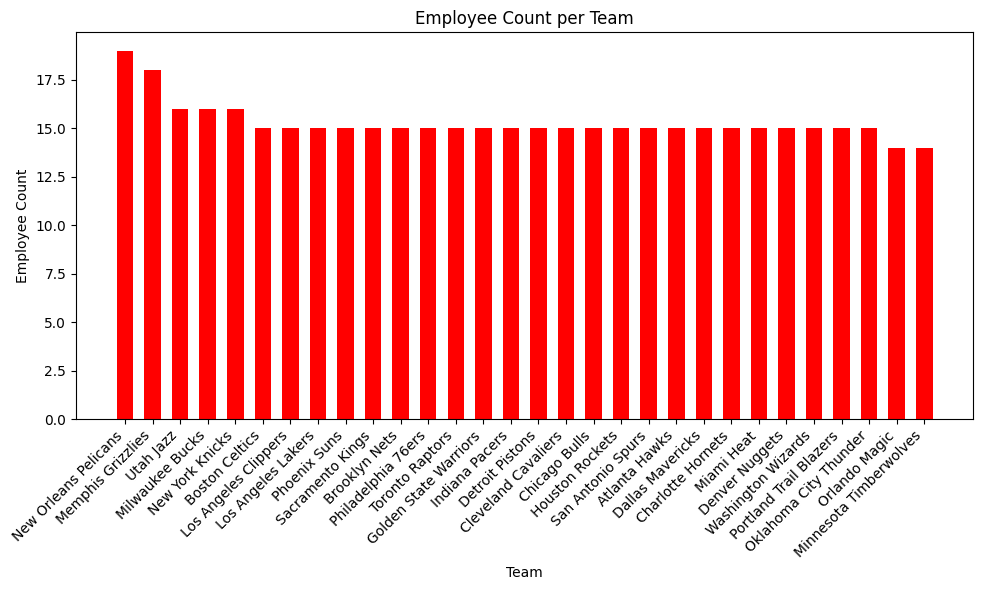

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(employee_per_team.index,employee_per_team.values,color='red',width=.6)
plt.xlabel('Team')
plt.ylabel('Employee Count')
plt.title('Employee Count per Team')
plt.xticks(rotation=45, ha='right')  #team name is too long so cant read it,so i rotate it for better visibility.Rotate name in 45 degree and ha means horizontal allignment
plt.tight_layout()
plt.show()

**Analysis :**
With this plot, we can identify the employee count in each team. The majority of teams have an equal number of employees. The **New Orleans Pelicans**
 have the highest employee count, while the **Orlando Magic** and **Minnesota Timberwolves** have the lowest.

●	Segregate employees based on their positions within the company.

In [ ]:
count_by_positon=df['Position'].value_counts()
print(count_by_positon)

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


**Visualization**


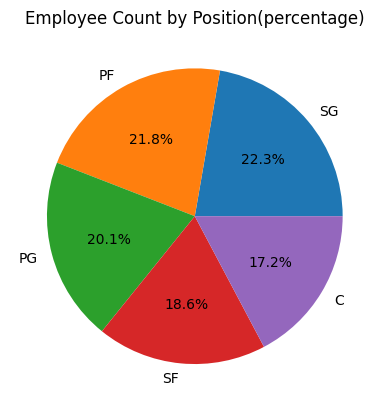

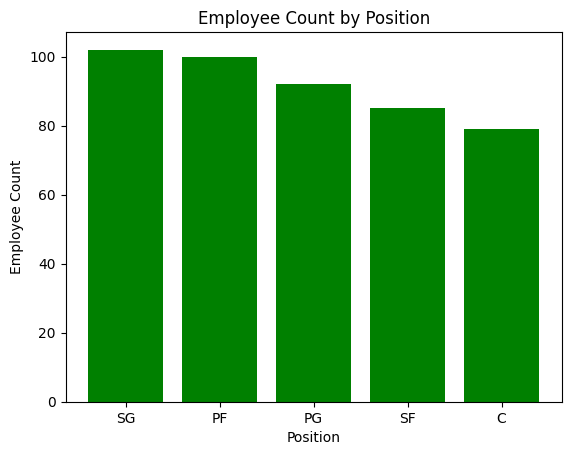

In [ ]:
plt.pie(count_by_positon,labels=count_by_positon.index,autopct='%1.1f%%')
plt.title('Employee Count by Position(percentage)')
plt.show()
plt.bar(count_by_positon.index,count_by_positon.values,color='green')
plt.xlabel('Position')
plt.ylabel('Employee Count')
plt.title('Employee Count by Position')
plt.show()

**Analysis :**
These plots shows the distribution of employees across different positions. The **SG**
  position has the highest number of employees, representing 22.3% of the total, making it the largest single group.
   The **C**
    position appears to have the smallest number of employees
     Overall, the employee count is relatively balanced across the positions, with no extreme difference.

●	Identify the predominant age group among employees.

In [71]:

#create bins for age groups
bins=[18,29,39,49,59,100]
labels=['18-29','30-39','40-49','50-59','60+']
df['AgeGroup']=pd.cut(df['Age'],bins=bins,labels=labels,right=False)
print(df['AgeGroup'].value_counts())
predominat_age_group=df['AgeGroup'].value_counts().idxmax()
print("predominat_age_group",predominat_age_group)



AgeGroup
18-29    308
30-39    145
40-49      5
50-59      0
60+        0
Name: count, dtype: int64
predominat_age_group 18-29


**Visualization**


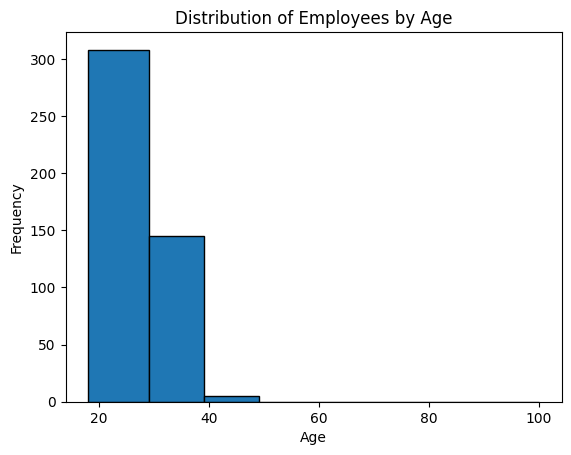

In [72]:
plt.hist(df['Age'],bins=bins,edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Employees by Age')
plt.show()

**Analysis :**
From this plot we can clearly understand that majority employees comes under age of 29

●	Discover which team and position have the highest salary expenditure. (2 marks)  

In [67]:

salary_expenditure = df.groupby(['Team', 'Position'])['Salary'].sum()

print("\nsalary_expenditure by team and position\n",salary_expenditure)
highest_salary_expenditure = salary_expenditure.idxmax()
print("\nName of team and position having heighest salary expenditure : ",highest_salary_expenditure)

max_salary_spend = salary_expenditure.max()
print("\nHeighest salary expenditure " ,max_salary_spend)


salary_expenditure by team and position
 Team                Position
Atlanta Hawks       C           22756250.0
                    PF          23952268.0
                    PG           9763400.0
                    SF           6000000.0
                    SG          10431032.0
                                   ...    
Washington Wizards  C           24490429.0
                    PF          11300000.0
                    PG          18022415.0
                    SF          11158800.0
                    SG          11356992.0
Name: Salary, Length: 149, dtype: float64

Name of team and position having heighest salary expenditure :  ('Los Angeles Lakers', 'SF')

Heighest salary expenditure  31866445.0


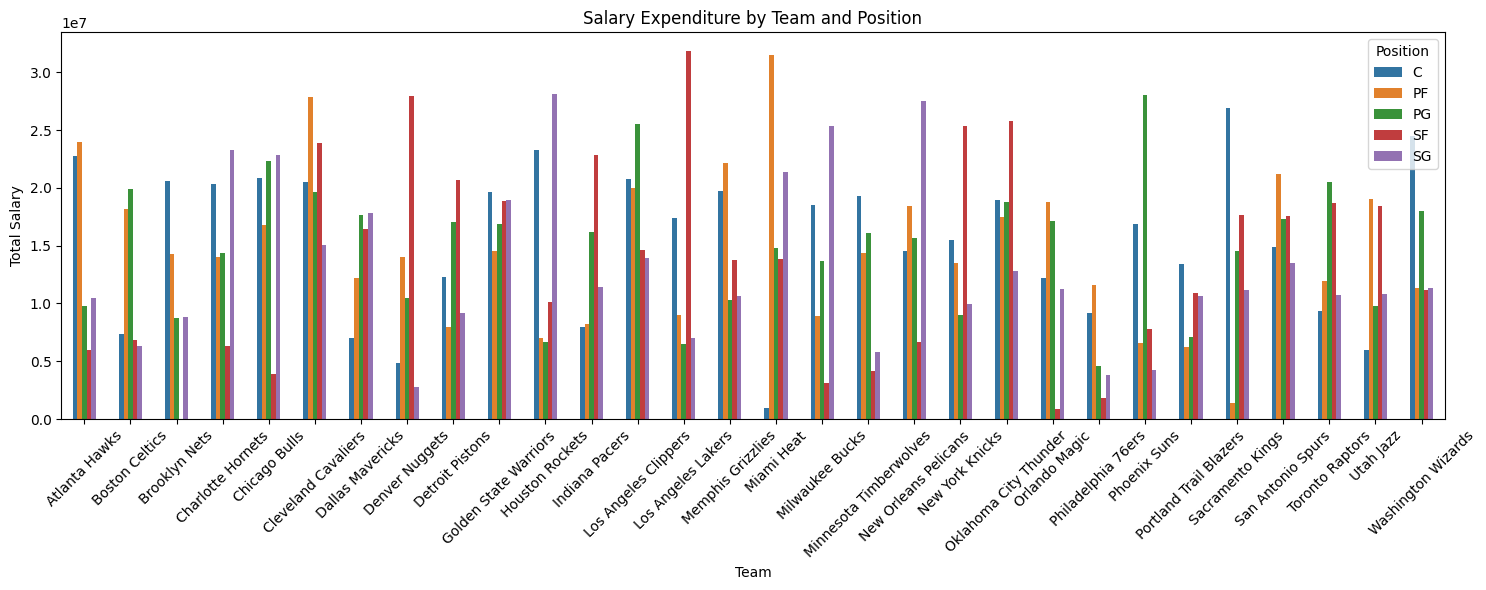

In [66]:
salary_df=pd.DataFrame(salary_expenditure)
plt.figure(figsize=(15,6))
sns.barplot(data=salary_df, x='Team', y='Salary', hue='Position',width=.5)
plt.xlabel('Team')
plt.ylabel('Total Salary')
plt.title('Salary Expenditure by Team and Position')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Analysis :**
From this plot we can identify that heighest salary is spent for position **SF**
 in team ***Los Angeles Lakers***


●	Investigate if there's any correlation between age and salary, and represent it visually. (2 marks)  



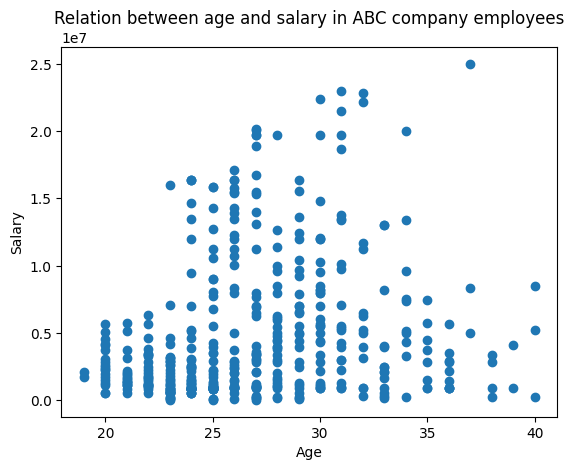

In [ ]:
#correlation of two variable can be shown using scatterplot is better
import matplotlib.pyplot as plt
plt.scatter(df['Age'], df['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Relation between age and salary in ABC company employees')
plt.show()
#

**Analysis :**
From this plot, we can understand that the majority of employees fall between the ages of 25 and 35, where salaries are generally higher, indicating that middle-aged employees earn more. However, the single highest salary belongs to an employee above 35 years of age.